In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

In [2]:
matplotlib.rc('font',family='NanumGothic')

In [4]:
df=pd.read_csv('DIABETEST.csv',engine='python',encoding='949')

In [5]:
df_y=df['Y']
df_x=df.drop('Y',axis=1,inplace=False)

In [6]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}'.format(df_train_y.shape))

train data x size:(309, 10)
train data y size:(309,)
test data x size:(133, 10)
test data y size:(309,)


In [7]:
tree_un=DecisionTreeRegressor(random_state=1234)
tree_un.fit(df_train_x,df_train_y)
print('score on test set:{:.3f}'.format(tree_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(tree_un.score(df_test_x,df_test_y)))

score on test set:1.000
score on test set:-0.143


In [8]:
tree_un

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [9]:
train_score=[]
test_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [10]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.143
1,2,0.953,-0.111
2,3,0.878,0.039
3,4,0.836,0.083
4,5,0.773,0.062
5,6,0.730,0.042
6,7,0.707,0.107
7,8,0.669,0.109
8,9,0.649,0.144
9,10,0.614,0.203


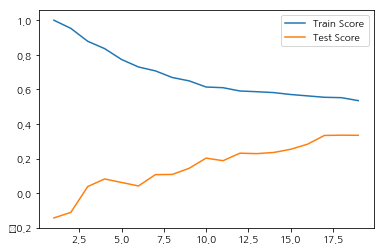

In [11]:
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='-',label='Test Score')
plt.legend()

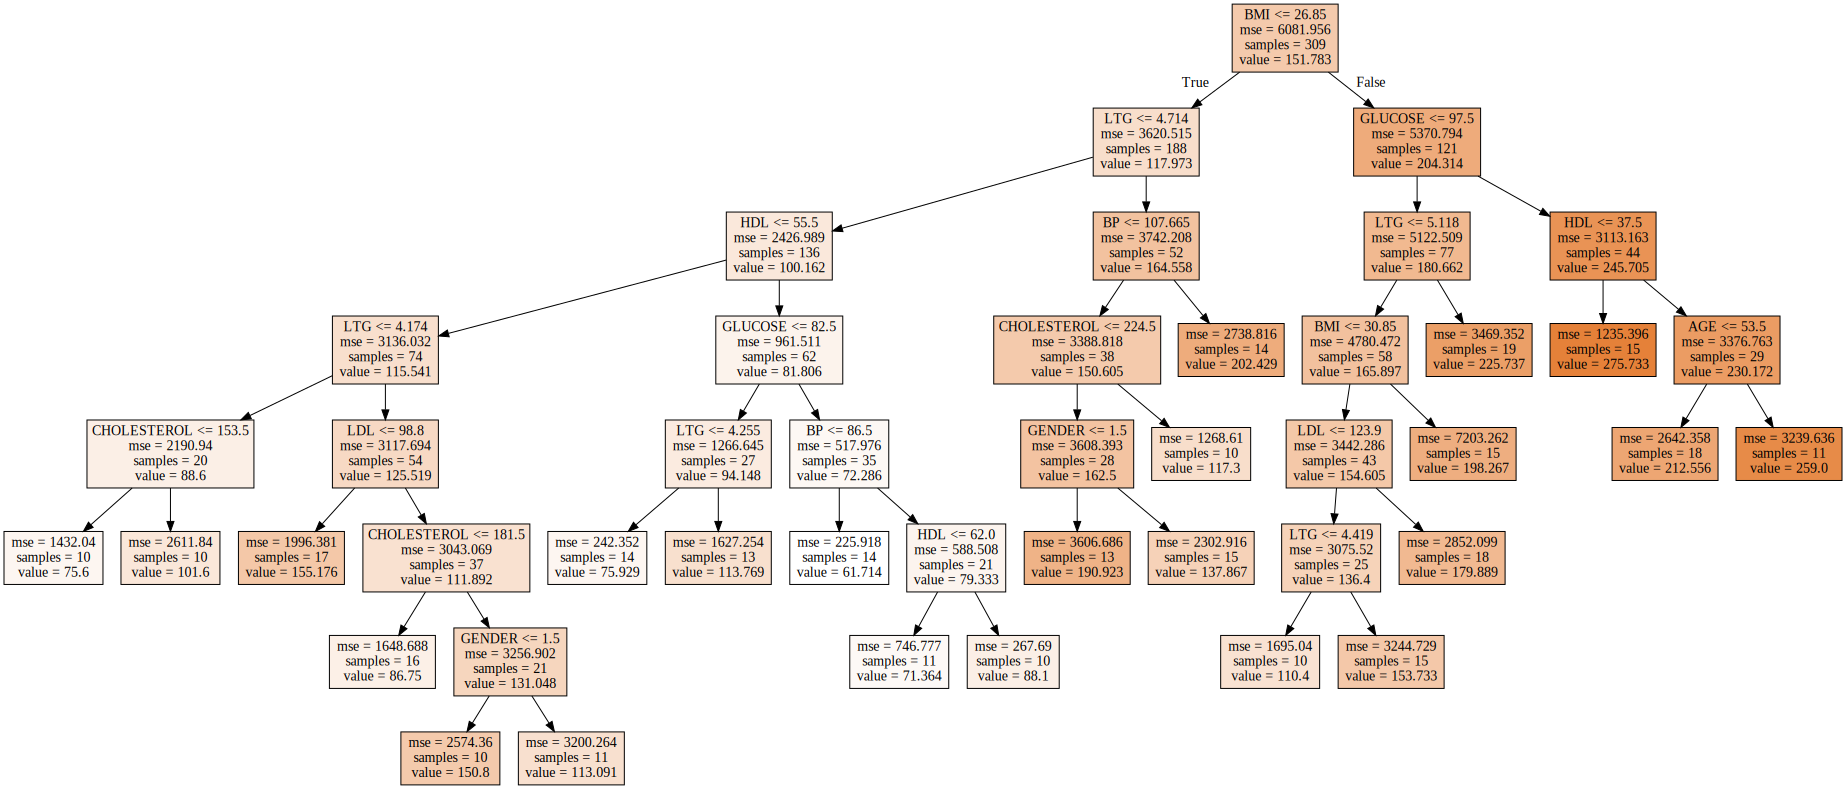

In [31]:
v_feature_names=df_train_x.columns
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=10)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_leaf.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_leaf.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [33]:
train_score=[]
test_score=[]
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=10,min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
                      
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

In [18]:
df_score_split.round(3)

,MinSamplessplit,TrainScore,TestScore
0,4,0.555,0.334
1,6,0.555,0.334
2,8,0.555,0.334
3,10,0.555,0.334
4,12,0.555,0.334
5,14,0.555,0.334
6,16,0.555,0.334
7,18,0.555,0.334
8,20,0.555,0.334
9,22,0.555,0.334


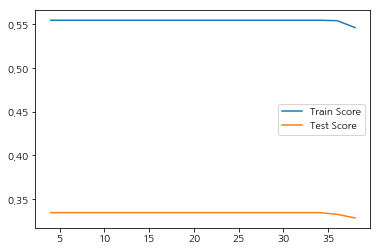

In [19]:
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='-',label='Test Score')
plt.legend()

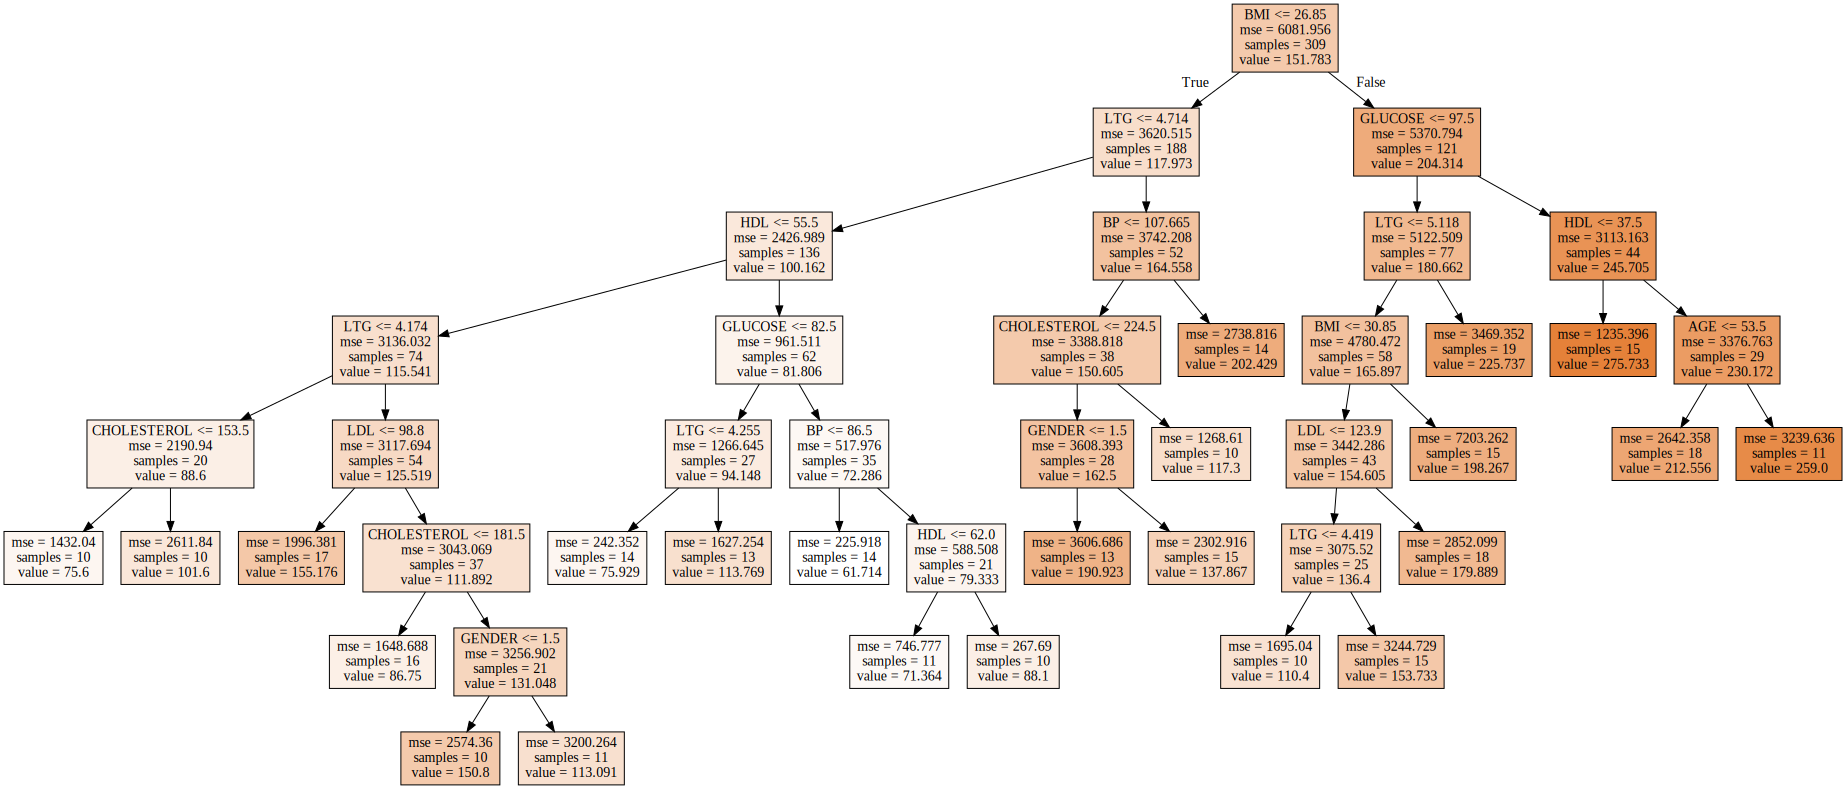

In [34]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=10,min_samples_split=12)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_split.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_split.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [35]:
train_score=[]
test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=10,min_samples_split=12\
                               ,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplessplit']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [36]:
df_score_depth.round(3)


,MinSamplessplit,TrainScore,TestScore
0,1,0.292,0.231
1,2,0.438,0.351
2,3,0.511,0.279
3,4,0.553,0.252
4,5,0.594,0.196
5,6,0.610,0.198
6,7,0.614,0.203
7,8,0.614,0.203
8,9,0.614,0.203
9,10,0.614,0.203


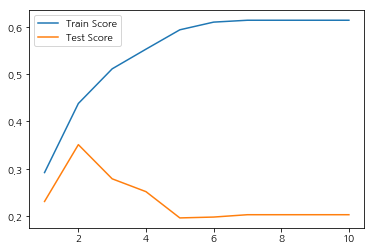

In [37]:
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='-',label='Test Score')
plt.legend()

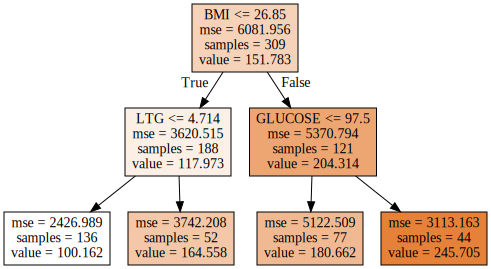

In [38]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=10,min_samples_split=12\
                                ,max_depth=2)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_depth.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_depth.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [39]:
tree_final=DecisionTreeRegressor(random_state=1234,min_samples_leaf=10,min_samples_split=12\
                                ,max_depth=2)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

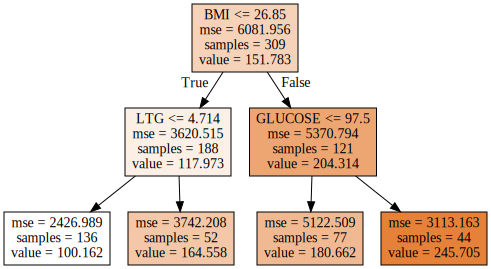

In [40]:
export_graphviz(tree_final,out_file='tree_final.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_final.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [41]:
df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=tree_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
df_importance.round(3)

,feature,importance
2,BMI,0.667
8,LTG,0.189
9,GLUCOSE,0.144
0,AGE,0.000
1,GENDER,0.000
3,BP,0.000
4,CHOLESTEROL,0.000
5,LDL,0.000
6,HDL,0.000
7,TCH,0.000


Text(0, 0.5, '변수')

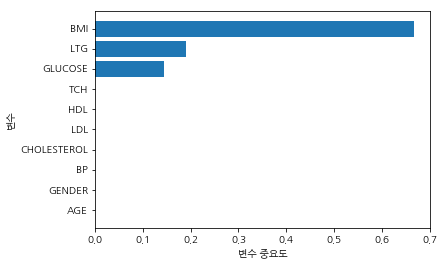

In [42]:
df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [43]:
estimator=DecisionTreeRegressor()
param_grid={'criterion':['mse','friedman_mse','mae'],'max_features':['auto','sqrt','log2'],\
           'max_depth':para_depth,'min_samples_split':para_split,'min_samples_leaf':para_leaf}
grid_df=GridSearchCV(estimator,param_grid,scoring='r2',n_jobs=-1)
grid_df.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_df.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_df.best_params_))
print('best score:\n{}'.format(grid_df.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
DecisionTreeRegressor(criterion='mae', max_depth=7, max_features='log2',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=15,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

best parameter:
{'criterion': 'mae', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 8}
best score:
0.402


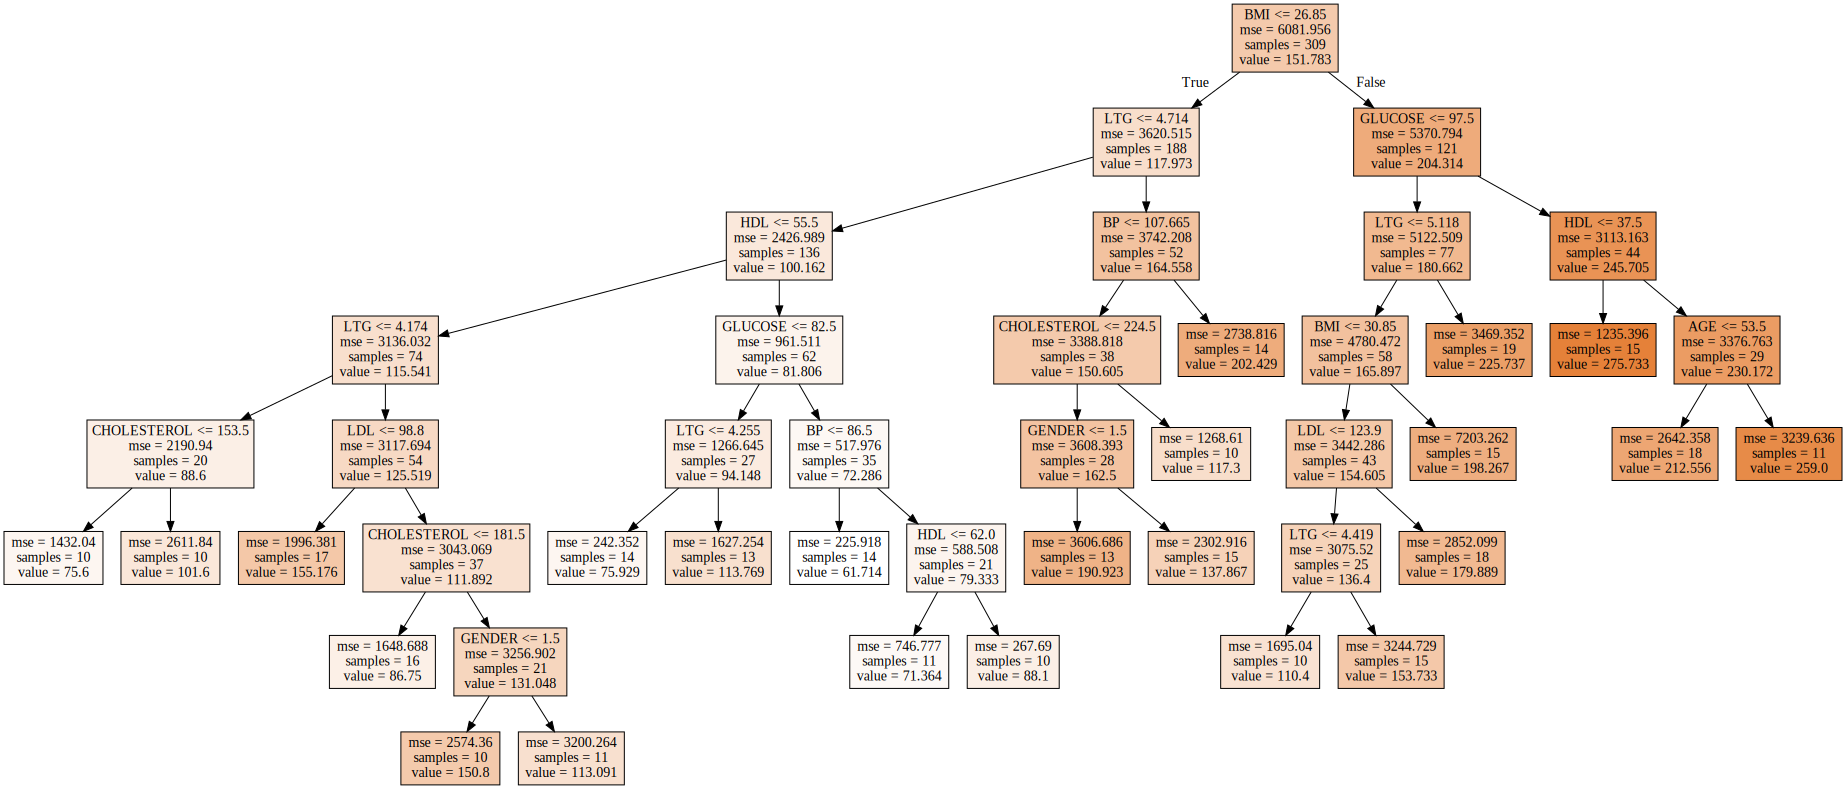

In [44]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=10,min_samples_split=4\
                                ,max_depth=10)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_depth.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_depth.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

# 실습2

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz
df_y=df['Y']
df_x=df.drop('Y',axis=1,inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

rf_un=RandomForestRegressor(random_state=1234)
rf_un.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(rf_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(rf_un.score(df_test_x,df_test_y)))

#데이터를 train데이터와 test데이터로 7:3으로 나눔.
#랜덤포레스트를 사용하여 회귀식을 만듬.

score on training set:0.892
score on test set:0.393


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
rf_un

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [47]:
train_score=[]
test_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
                      
df_score_n = pd.DataFrame()
df_score_n['MinSamplesLeaf']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

#등간격을 10으로 하여 적합한  n 을 찾음.
#아래 표를 보니 test가 가장 높을때인 50이 좋은거 같음.

In [48]:
df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.892,0.393
1,20,0.908,0.404
2,30,0.908,0.432
3,40,0.911,0.442
4,50,0.914,0.458
5,60,0.915,0.454
6,70,0.915,0.451
7,80,0.917,0.451
8,90,0.919,0.450
9,100,0.919,0.455


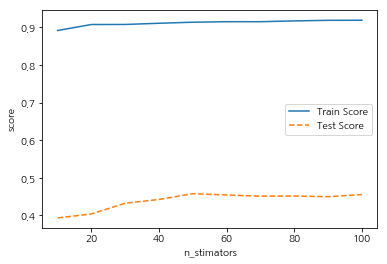

In [49]:
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label='Test Score')
plt.ylabel('score'); plt.xlabel('n_stimators')
plt.legend()

In [50]:
train_score=[]
test_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1234,n_estimators=50,\
                             min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

#n_estimators 50으로 맞추고 최적leaf를 찾음.
#아래 표를 보아하니 leaf가 15일때 0.483으로 제일 높음. 

In [51]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.914,0.458
1,2,0.877,0.466
2,3,0.831,0.467
3,4,0.782,0.465
4,5,0.748,0.460
5,6,0.715,0.460
6,7,0.694,0.466
7,8,0.670,0.467
8,9,0.651,0.474
9,10,0.634,0.469


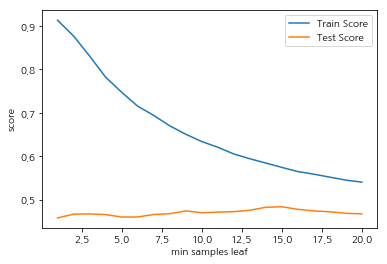

In [52]:
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [53]:
train_score=[]
test_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1234,n_estimators=50,\
                             min_samples_leaf=14,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
                      
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

#leaf를 14로 고정하고 split를 구함.
#split가 4~28일때 0.482로 가장 높음.
#split가 가장 적은 4를 채택.

In [54]:
df_score_split.round(3)

,MinSamplessplit,TrainScore,TestScore
0,4,0.584,0.482
1,6,0.584,0.482
2,8,0.584,0.482
3,10,0.584,0.482
4,12,0.584,0.482
5,14,0.584,0.482
6,16,0.584,0.482
7,18,0.584,0.482
8,20,0.584,0.482
9,22,0.584,0.482


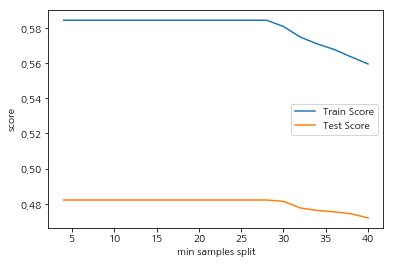

In [55]:
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples split')
plt.legend()

In [56]:
train_score=[]
test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1234,n_estimators=50,\
                             min_samples_leaf=14,min_samples_split=4\
                               ,max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplessplit']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

#split를 4로 고정하고 depth를 구함
#depth가 3일때 0.488로 가장 높음.

In [57]:
df_score_depth.round(3)


,MinSamplessplit,TrainScore,TestScore
0,1,0.386,0.399
1,2,0.489,0.470
2,3,0.550,0.488
3,4,0.575,0.484
4,5,0.583,0.483
5,6,0.584,0.482
6,7,0.584,0.482
7,8,0.584,0.482
8,9,0.584,0.482
9,10,0.584,0.482


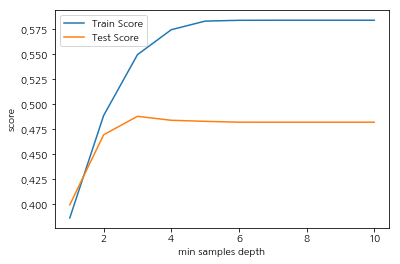

In [58]:
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples depth')
plt.legend()

In [64]:
rf_final=RandomForestRegressor(random_state=1234,n_estimators=50,\
                             min_samples_leaf=14,min_samples_split=4\
                               ,max_depth=3)
rf_final.fit(df_train_x,df_train_y)
print('score on trainig set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
rf_final

#최적의 기준들을 구해서 분석해봄
#test데이터를 0.488정도 설명가능함. 딱히 마음에 드는 결과는 아니지만 최적이니 넘어가겠음.

score on trainig set:0.550
score on test set:0.488


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

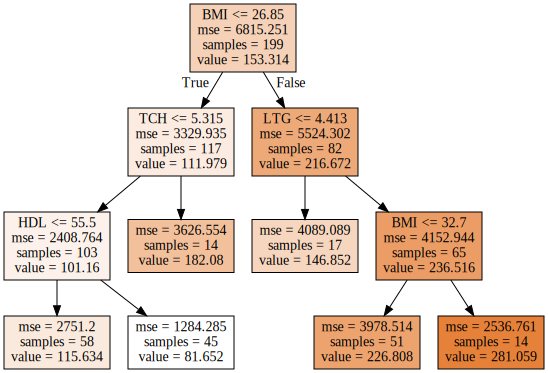

In [65]:
v_feature_names=df_train_x.columns

export_graphviz(rf_final.estimators_[0],out_file='rfr_final_0.dot',\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('rfr_final_0.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))
#시험삼아 50개의 나무 중에서 한개를 가져와봄
#잘 된건지는 모르겠지만 아까 앞에서한 decisiontree와 크게 다르지 않은거 같음.
#depth가 깊지 않아 그래프를 이해하기 더 쉬움. 대체적으로 만족

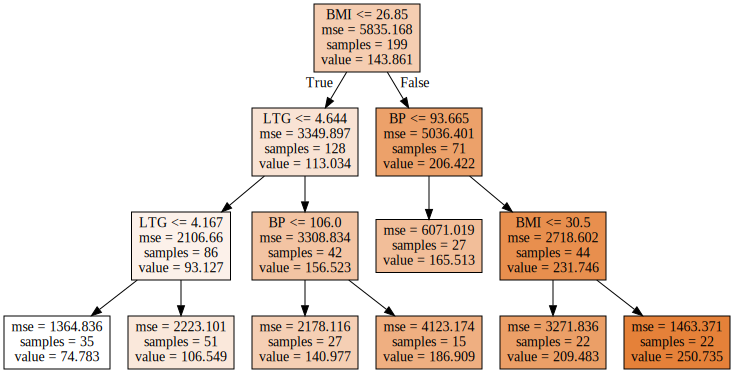

In [67]:
v_feature_names=df_train_x.columns

export_graphviz(rf_final.estimators_[1],out_file='rfr_final_1.dot',\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('rfr_final_1.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

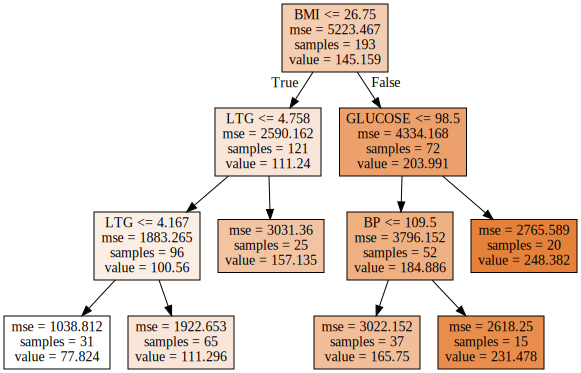

In [69]:
v_feature_names=df_train_x.columns

export_graphviz(rf_final.estimators_[20],out_file='rfr_final_10.dot',\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('rfr_final_10.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

# 그래디언트 부스팅

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
df_y=df['Y']
df_x=df.drop('Y',axis=1,inplace=False)

In [73]:
gb_un=GradientBoostingRegressor(random_state=1234)
gb_un.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(rf_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(rf_un.score(df_test_x,df_test_y)))

score on training set:0.892
score on test set:0.393


In [74]:
train_score=[]
test_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingRegressor(n_estimators=v_n_estimators,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
                      
df_score_n = pd.DataFrame()
df_score_n['MinSamplesLeaf']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score



In [75]:
df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.504,0.430
1,20,0.639,0.494
2,30,0.707,0.500
3,40,0.751,0.487
4,50,0.778,0.480
5,60,0.802,0.472
6,70,0.825,0.465
7,80,0.841,0.462
8,90,0.852,0.459
9,100,0.865,0.451


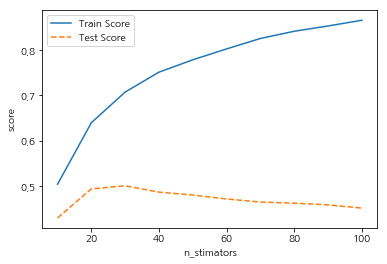

In [76]:
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label='Test Score')
plt.ylabel('score'); plt.xlabel('n_stimators')
plt.legend()

In [77]:
train_score=[]
test_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score



In [78]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.707,0.500
1,2,0.708,0.505
2,3,0.701,0.505
3,4,0.700,0.492
4,5,0.691,0.468
5,6,0.683,0.492
6,7,0.682,0.496
7,8,0.675,0.490
8,9,0.679,0.498
9,10,0.684,0.502


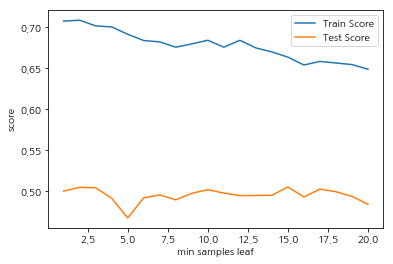

In [79]:
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [94]:
train_score=[]
test_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=2,min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
                      
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score



In [95]:
df_score_split.round(3)

,MinSamplessplit,TrainScore,TestScore
0,4,0.708,0.505
1,6,0.706,0.503
2,8,0.707,0.503
3,10,0.707,0.503
4,12,0.707,0.503
5,14,0.707,0.503
6,16,0.707,0.503
7,18,0.707,0.503
8,20,0.703,0.503
9,22,0.701,0.503


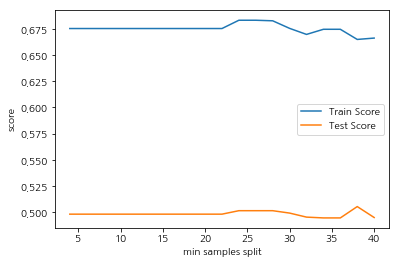

In [82]:
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples split')
plt.legend()

In [96]:
train_score=[]
test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=2,min_samples_split=40\
                               ,max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplessplit']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score



In [97]:
df_score_depth.round(3)


,MinSamplessplit,TrainScore,TestScore
0,1,0.486,0.495
1,2,0.594,0.521
2,3,0.686,0.518
3,4,0.760,0.473
4,5,0.794,0.455
5,6,0.827,0.468
6,7,0.847,0.471
7,8,0.851,0.423
8,9,0.858,0.452
9,10,0.860,0.459


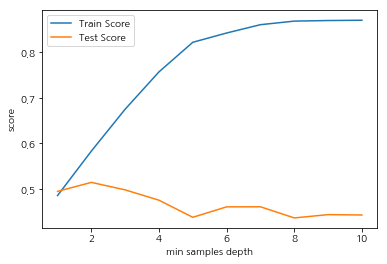

In [85]:
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples depth')
plt.legend()

In [98]:
train_score=[]
test_score=[]
para_lr=[lr*0.1 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=2,min_samples_split=40\
                               ,max_depth=2,learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_lr=pd.DataFrame()
df_score_lr['learningrate']=para_lr
df_score_lr['trainscore']=train_score
df_score_lr['testscore']=test_score


In [99]:
df_score_lr.round(3)

,learningrate,trainscore,testscore
0,0.1,0.594,0.521
1,0.2,0.678,0.520
2,0.3,0.719,0.490
3,0.4,0.747,0.483
4,0.5,0.779,0.457
5,0.6,0.806,0.369
6,0.7,0.801,0.341
7,0.8,0.812,0.383
8,0.9,0.804,0.296


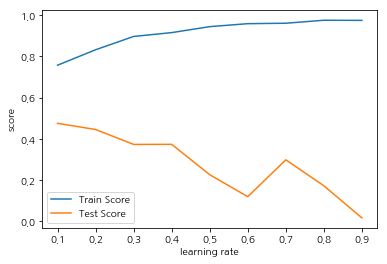

In [88]:
plt.plot(para_lr,train_score,linestyle='-',label='Train Score')
plt.plot(para_lr,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('learning rate')
plt.legend()

In [100]:
gb_final=GradientBoostingRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=2,min_samples_split=40\
                               ,max_depth=2,learning_rate=0.1)
gb_final.fit(df_train_x,df_train_y)

print('score on trainig set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(gb_final.score(df_test_x,df_test_y)))

score on trainig set:0.594
score on test set:0.521


In [101]:
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=gb_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
df_importance.round(3)



,feature,importance
2,BMI,0.420
8,LTG,0.358
3,BP,0.064
9,GLUCOSE,0.063
6,HDL,0.033
7,TCH,0.019
0,AGE,0.015
4,CHOLESTEROL,0.012
1,GENDER,0.011
5,LDL,0.005


Text(0, 0.5, '변수')

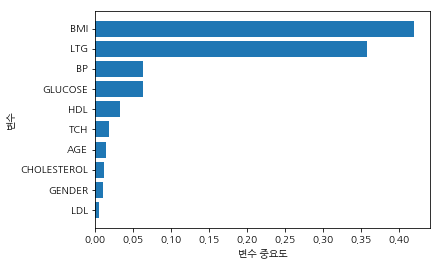

In [102]:
df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')


In [103]:
estimator=GradientBoostingRegressor(random_state=1234)
param_grid={'criterion':['mse','friedman_mse','mae'],'max_features':['auto','sqrt','log2'],\
           'learning_rate':para_lr,'max_depth':para_depth,'min_samples_split':para_split,\
            'min_samples_leaf':para_leaf}
grid_df=GridSearchCV(estimator,param_grid,scoring='r2',n_jobs=-1)
grid_df.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_gb.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_gb.best_params_))
print('best score:\n{}'.format(grid_gb.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 